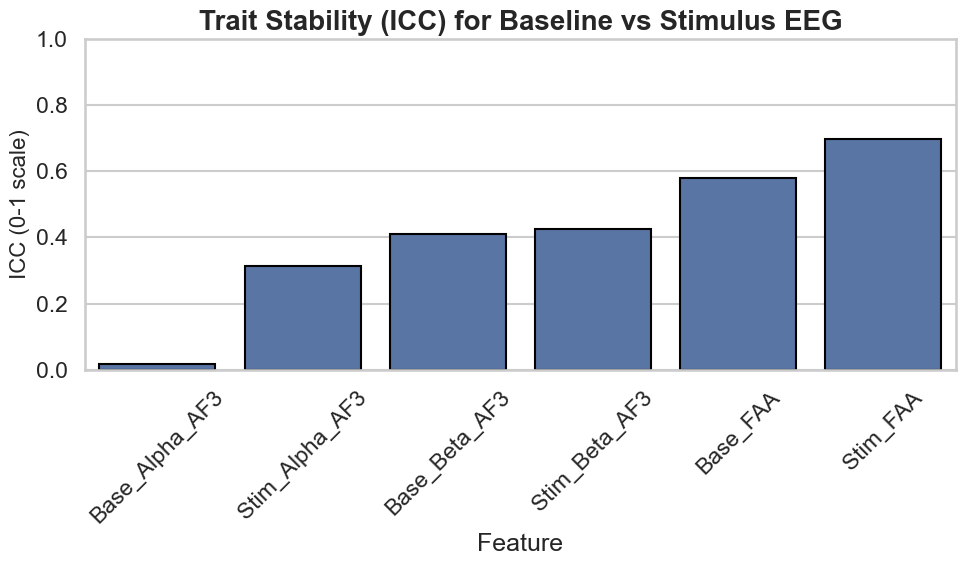

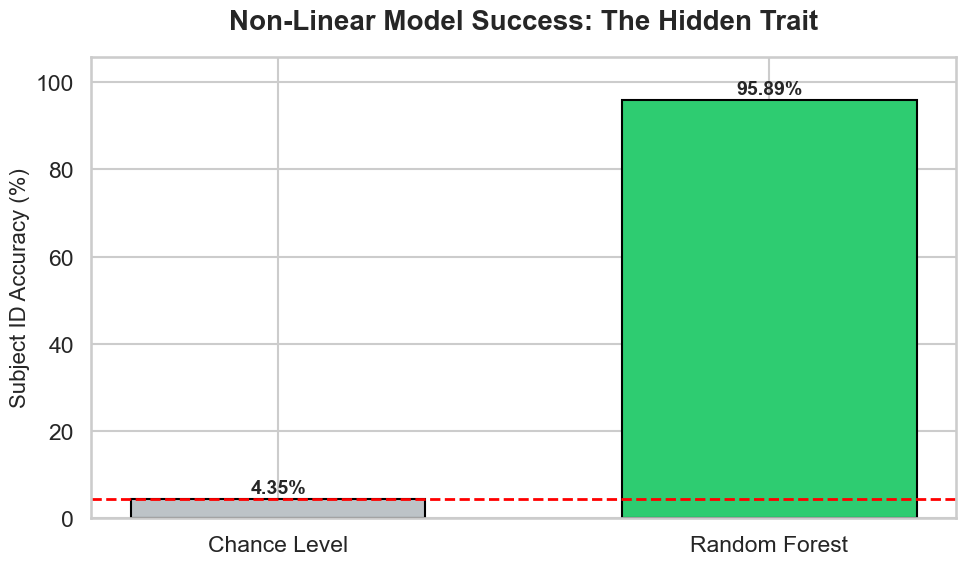

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['font.family'] = 'sans-serif'

# 1. Load Data
try:
    df_anova = pd.read_csv('../outputs/models/variance_components_concat.csv')
    df_ml = pd.read_csv('../outputs/models/ml_comparison_concat.csv')
except FileNotFoundError:
    print("Error: Results files not found. Please run 03_analysis_correlations.ipynb first.")


# ========================================================
# PLOT 1: ANOVA VARIANCE PARTITIONING (Stacked Bar)
# ========================================================

plt.figure(figsize=(10, 6))
sns.barplot(data=df_anova, x='Feature', y='ICC (Trait Stability)', color="#4c72b0", edgecolor='black')

plt.title("Trait Stability (ICC) for Baseline vs Stimulus EEG", fontsize=20, fontweight='bold')
plt.ylabel("ICC (0-1 scale)", fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.savefig('../outputs/icc_plot.png', dpi=300)
plt.show()


    

# ========================================================
# PLOT 2: LINEAR VS NON-LINEAR COMPARISON
# ========================================================


fig, ax = plt.subplots(figsize=(10, 6))


chance_val = df_ml['chance_level'][0] * 100
rf_val = df_ml['accuracy'][0] * 100

models = ['Chance Level', 'Random Forest']
scores = [chance_val, rf_val]

# Colors
colors = ['#bdc3c7', '#2ecc71']

bars = ax.bar(models, scores, color=colors, width=0.6, edgecolor='black')

# Add Chance Line
ax.axhline(y=chance_val, color='red', linestyle='--', linewidth=2, label='Chance Level')

# Formatting
ax.set_title('Non-Linear Model Success: The Hidden Trait', fontsize=20, fontweight='bold', pad=20)
ax.set_ylabel('Subject ID Accuracy (%)', fontsize=16)
ax.set_ylim(0, max(scores) + 10)

# Add Value Labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.2f}%', ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/model_comparison.png', dpi=300)
plt.show()